# Welcome to the Second Assignment of ECE421

In this assignment, wou will
* Implement different gradient descent optimizers, namely Heavy Ball Momentum, Nesterov Accelerated Gradient, and ADAM
* Implement multiclass logistic regression
* Trian your multiclass logistic regression with different optimizers
* Implement a simple K-means Clustering

This file is a Jupyter Notebook. You can double-click on section headers to show code and run each section with Shift+Enter.

**IMPORTANT:** You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

# 0 Setup

## 0.1 Mounting your Drive and setting up mount symlink

In [2]:
#@title mount your Google Drive, set up mount symlink, and apt install requirements
#@markdown Your work will be stored in a folder called `ece421_f2024_A2_folder` by default
#@markdown to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
from importlib import reload
drive.mount('/content/gdrive', force_remount=True)

## setting the path parameters and creating the folder if needed
DRIVE_PATH = '/content/gdrive/MyDrive/ece421_f2024_A2_folder'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## make a symlink
SYM_PATH = '/content/ece421_f2024_A2_folder'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

!apt install the requirements
!apt update
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        ffmpeg
!apt-get install python-opengl -y
!apt install xvfb -y

Mounted at /content/gdrive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package requirements
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://p

## 0.2. Cloning the updated version of the repository in a new directory, *i.e.,*`ece421_f2024_A2_folder`, and installing the required python modules

We do not want to mess up with your changes to the previous assignment. So, we create a new directory, named `ece421_f2024_A2_folder`, and will clone the latest version of the assignments repository there.

In [3]:
#@title ## 0.2.1 Cloning homework repo.
#@markdown Similar to A1, you may be promped to restart your session.
#@markdown We will reset the working directory and reload the required modules
#@markdown in the following cells.

#@markdown You just need to run this cell once.


A2_SYM_PATH = '/content/gdrive/MyDrive/ece421_f2024_A2_folder'
%cd $A2_SYM_PATH

!git clone https://github.com/erfanmeskar/ece421fall24_assignments.git

REPO_PATH = '/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments'
%cd $REPO_PATH

/content/gdrive/MyDrive/ece421_f2024_A2_folder
fatal: destination path 'ece421fall24_assignments' already exists and is not an empty directory.
/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments


In [4]:
#@title ### 0.2.2 Installing the requirements.


ASSIGNMENT_PATH = '/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2'
%cd $ASSIGNMENT_PATH
%pip install -r requirements_colab.txt

/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 907.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: opencv-python
    F

## 0.3. Importing the required modules


In [5]:
ASSIGNMENT_PATH = '/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2'
%cd $ASSIGNMENT_PATH

import os
from IPython.display import display, Markdown
from importlib import reload

from sklearn import datasets
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

import myTorch
import tests_A2
import util

/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2


# 1. Gradient Descent
In the `myTorch.py` file, you will complete the `Optimizer` class implementation, which will be used in the `MultiClassLogisticRegression` class to train a logistic regression model.

## 1.1 Optimizer.sgd method
In this part, you should implement the `Optimizer.sgd` method.
This function computes the update vector that will be used by gradient descent algorithm (*i.e.*, $-\eta \nabla_{\!\underline{x}}f(\underline{x}_t)$, where $\eta$ denotes the learning rate).

Useful attributes for implementing this function is:
  * `self.lr`: the learning rate.

After completing the implementation of `Optimizer.sgd`, run the following cells to execute tests `tests_A2.q1()`, `tests_A2.q2()`, `tests_A2.q3()`, and `tests_A2.q4()`.

Note the displayed text outputs and the figures generated by each test. Answer the questions in the handout, accordingly.

**Note:** To save the displayed figures, right click on each figure and save it as image.


* With learning rate 0.0010: $w^\star=$ 3.00565, $f(w^\star)=$ 160.45215 and $\nabla f(w^\star)=$ 80.11296, and converged after 20 iterations

* With learning rate 0.0050: $w^\star=$ -0.27054, $f(w^\star)=$ 5.32112 and $\nabla f(w^\star)=$ 14.58920, and converged after 20 iterations

* With learning rate 0.0100: $w^\star=$ -0.93082, $f(w^\star)=$ 0.04785 and $\nabla f(w^\star)=$ 1.38351, and converged after 20 iterations

* With learning rate 0.0500: $w^\star=$ -1.00000, $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ 0.00000, and converged after 1 iterations

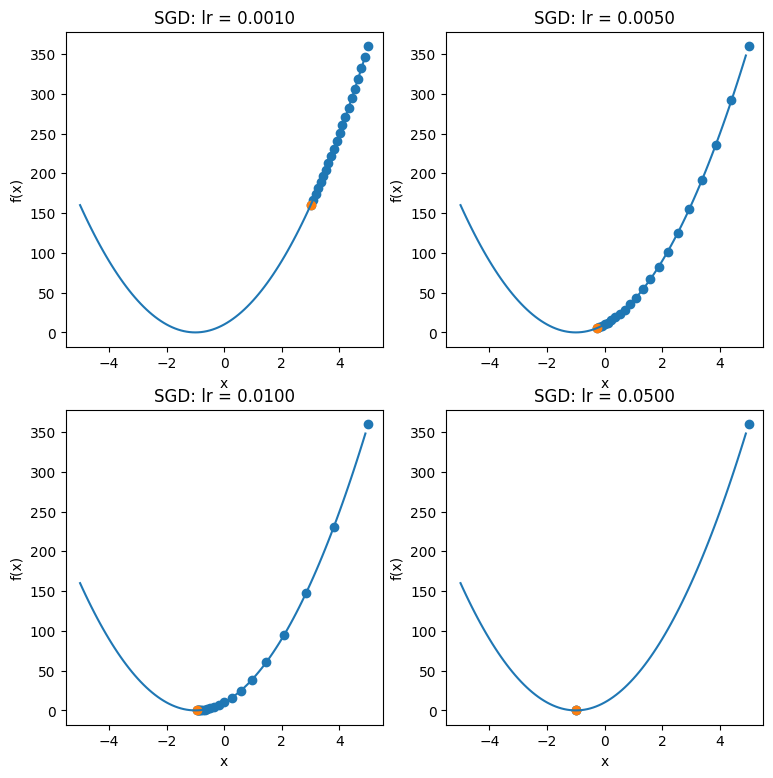

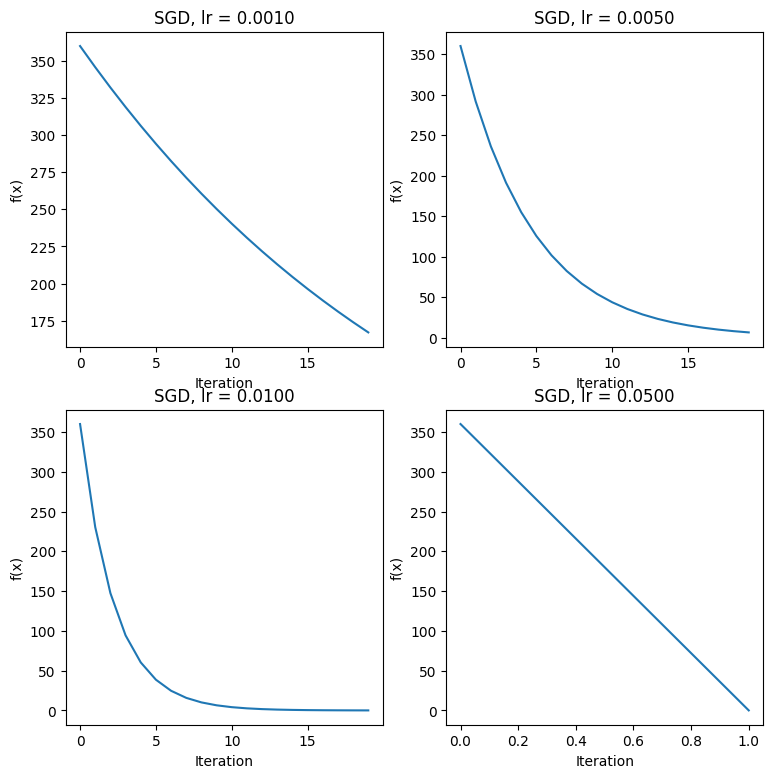

In [5]:
#@title q1( ) test

#@markdown The test function `q1()` runs your SGD implementation with four
#@markdown different learning rates to find
#@markdown $$w^\star = \underset{w}{\arg \min} f(w) = 10w^2 + 20w + 10.$$
#@markdown The starting point used by this test is $w_0=5$ and the maximum number
#@markdown of iteration is set to $20$.

#@markdown This function reports the value of $w^\star$
#@markdown together with some other information on your screen. `q1()` should
#@markdown show slow convergence for learning rates $0.001$ and $0.005$, and
#@markdown faster convergence with learning rates $0.01$ and $0.05$.


reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q1()

* With learning rate 0.0010: $w^\star=$ 0.24216, $f(w^\star)=$ 33.94514 and $\nabla f(w^\star)=$ 54.65503, and converged after 35 iterations

* With learning rate 0.0050: $w^\star=$ -0.99900, $f(w^\star)=$ 0.00002 and $\nabla f(w^\star)=$ 0.04415, and converged after 35 iterations

* With learning rate 0.0100: $w^\star=$ -1.00000, $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ 0.00004, and converged after 26 iterations

* With learning rate 0.0500: $w^\star=$ -3545.00937, $f(w^\star)=$ 276320053.89031 and $\nabla f(w^\star)=$ -155936.41250, and converged after 35 iterations

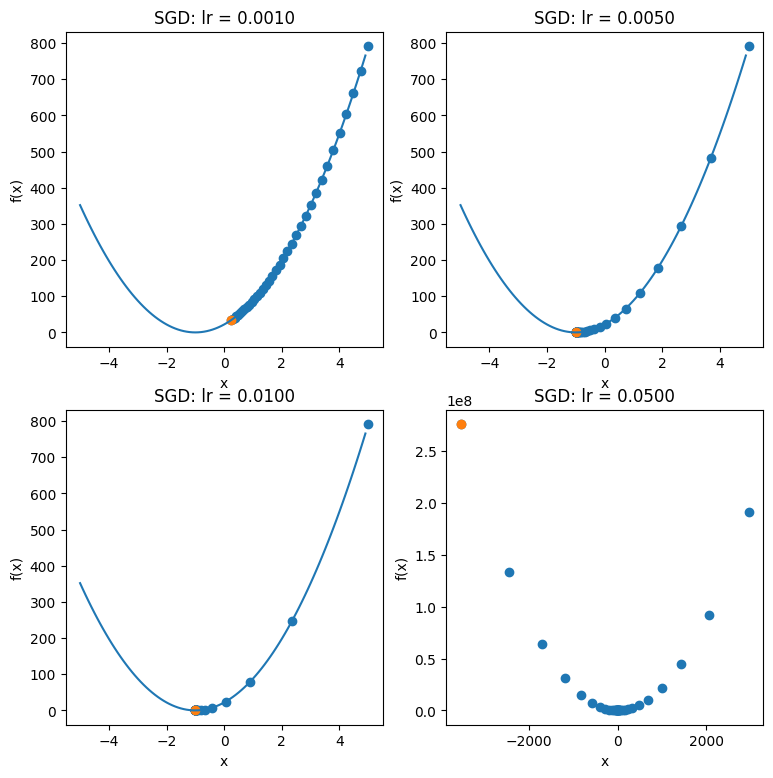

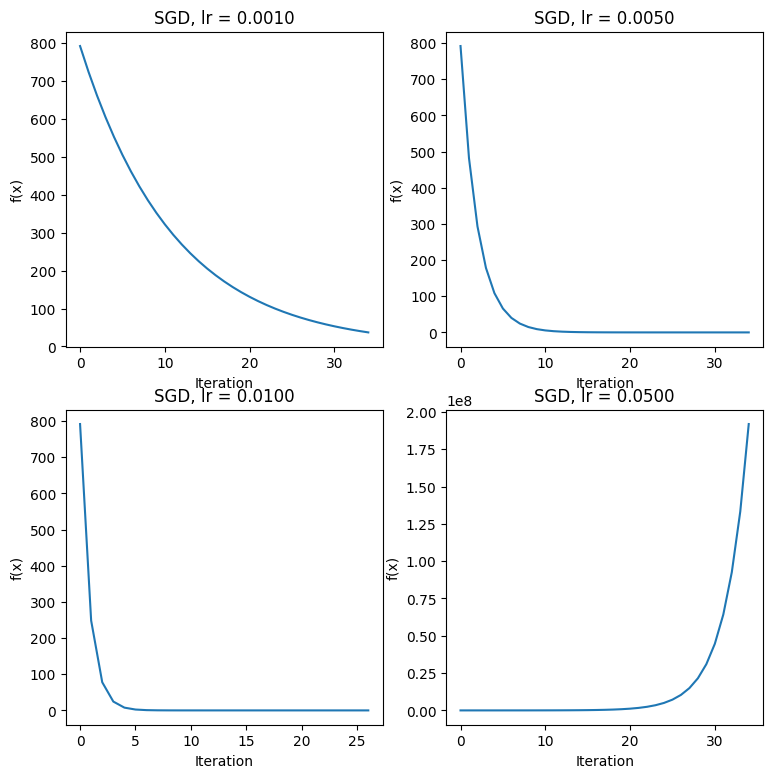

In [6]:
#@title q2( ) test
#@markdown The test function `q2()` runs your SGD implementation with four
#@markdown ifferent learning rates to find
#@markdown $$w^\star = \underset{w}{\arg \min} f(w) = 22w^2 + 44w + 22.$$
#@markdown The starting point used by this test is $w_0=5$, and the maximum
#@markdown number of iteration is set to $35$.

#@markdown This function reports the value of $w^\star$ together with some other information on your screen. With a correct implementation of SGD, `q2()` must show that SGD stopped after $35$ iteration without meeting the convergence criterion with $\eta=0.001$ and $\eta=0.005$. However, with $\eta = 0.01$, you should be able to find the optimal solution with smaller number of iterations.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q2()

* With learning rate 0.0010: $w^\star=$ 1.21767, $f(w^\star)=$ 8.50953 and $\nabla f(w^\star)=$ 0.00090, and converged after 174 iterations

* With learning rate 0.0050: $w^\star=$ 1.21766, $f(w^\star)=$ 8.50953 and $\nabla f(w^\star)=$ 0.00010, and converged after 33 iterations

* With learning rate 0.0100: $w^\star=$ 1.21766, $f(w^\star)=$ 8.50953 and $\nabla f(w^\star)=$ 0.00002, and converged after 12 iterations

* With learning rate 0.0500: $w^\star=$ -0.18544, $f(w^\star)=$ -5.15785 and $\nabla f(w^\star)=$ 22.52515, and converged after 2000 iterations

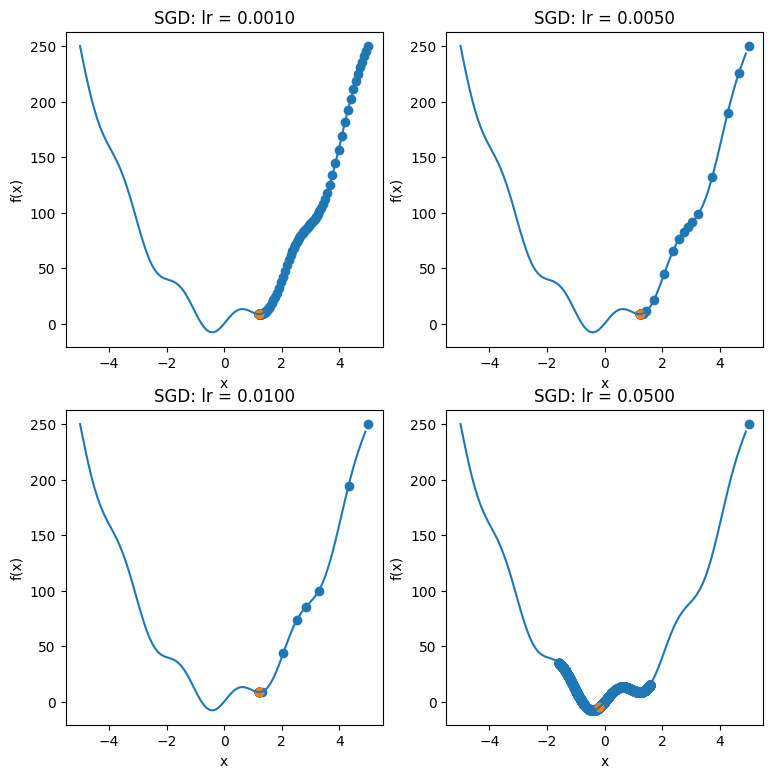

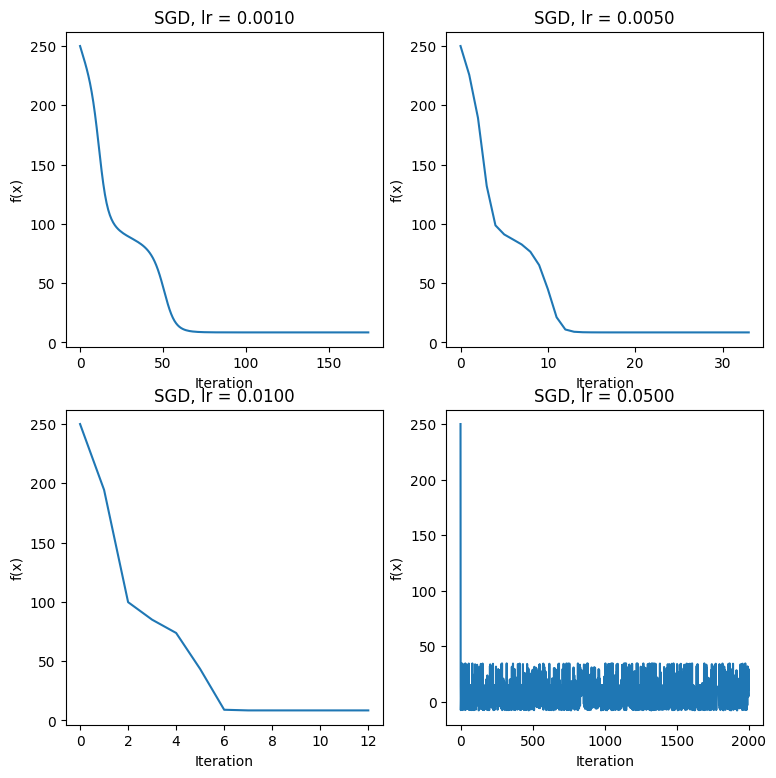

In [7]:
#@title q3( ) test
#@markdown The test function `q3()` runs your SGD implementation with four
#@markdown different learning rates to find
#@markdown $$w^\star = \underset{w}{\arg \min} f(w) = 10w^2 + 10\sin(\pi w).$$
#@markdown The starting point used by this test is $w_0=5$, and the maximum
#@markdown number of iteration is set to $2000$.

#@markdown This function reports the value of $w^\star$ together with some other
#@markdown information on your screen. With a correct implementation of SGD, `q3()`
#@markdown must show that SGD fails to converge to the global optimum point with
#@markdown these four learning rate values.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q3()

* With learning rate 0.0010: $w^\star=$ [4.04380744e-01 2.34982179e-18], $f(w^\star)=$ 0.32705 and $\nabla f(w^\star)=$ [1.61752297e+00 1.87985744e-16], and converged after 500 iterations

* With learning rate 0.0100: $w^\star=$ [2.35091199e-005 1.49196971e-201], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [9.40364794e-005 1.19357577e-199], and converged after 287 iterations

* With learning rate 0.0200: $w^\star=$ [1.10992940e-05 1.58419563e-33], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [4.43971761e-05 1.26735651e-31], and converged after 149 iterations

* With learning rate 0.0300: $w^\star=$ [5.22946583e-28 3.47647487e+73], $f(w^\star)=$ 48343509962514760517199226283649549974118572274638431763722213775541146324896081899945045831973894544930997139651022377117825288545641953471903039488.00000 and $\nabla f(w^\star)=$ [2.09178633e-27 2.78117989e+75], and converged after 500 iterations

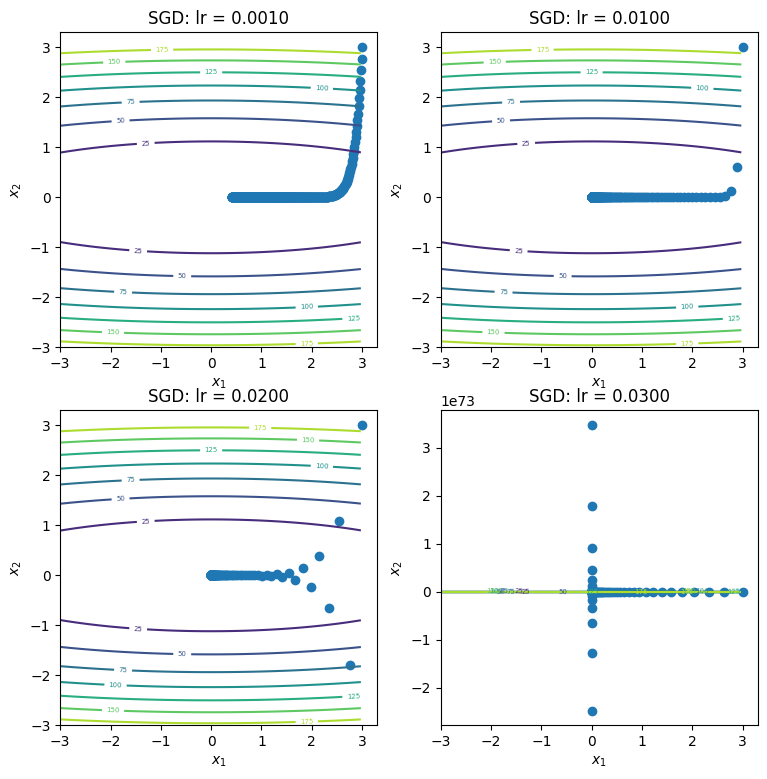

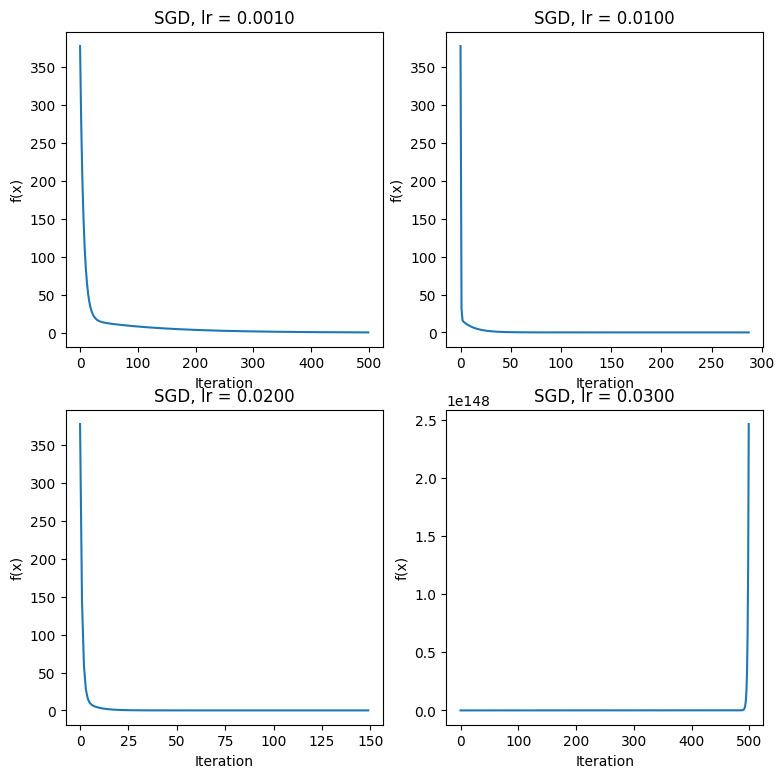

In [8]:
#@title q4( ) test
#@markdown The test function `q4()` runs your SGD implementation with four
#@markdown different learning rates to find
#@markdown $$\underline{w}^\star = \underset{\underline{w}}{\arg \min} f(\underline{w}) = 2w_1^2 + 0.2w_2^2.$$
#@markdown The starting point used by this test is $\underline{w}_0=(3,3)$,
#@markdown and the maximum number of iteration is set to $500$.

#@markdown This function reports the value of $w^\star$ together with some other
#@markdown information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q4()

## 1.2 `Optimizer.heavyball_momentum` and `Optimizer.nestrov_momentum` methods
In this part, you should implement the  `Optimizer.heavyball_momentum` method.

Note that the implementations of `Optimizer.heavyball_momentum` and `Optimizer.nestrov_momentum` are identical. This is due to the fact that the only difference between these two variants of SGD is in their input gradient vector.

You will be implementing the function listed below.
  * `heavyball_momentum(self, gradient)`

Useful attributes for implementing this function is:
  * `self.lr` and `self.gama`: the learning rate and the momentum parameter.
  * `self.v`: this attribute can be used to record the last momentum (*i.e.*, update) vector.

After completing the implementation of `Optimizer.heavyball_momentum`, run the following cells to execute tests `tests_A2.q5()`, `tests_A2.q6()`, `tests_A2.q7()`, and `tests_A2.q8()`.


* With learning rate 0.0003: $w^\star=$ -0.41490, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ 0.00125, and converged after 240 iterations

* With learning rate 0.0004: $w^\star=$ -0.41490, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ 0.00159, and converged after 231 iterations

* With learning rate 0.0006: $w^\star=$ -0.41490, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ 0.00131, and converged after 232 iterations

* With learning rate 0.0010: $w^\star=$ -0.41492, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ -0.00079, and converged after 243 iterations

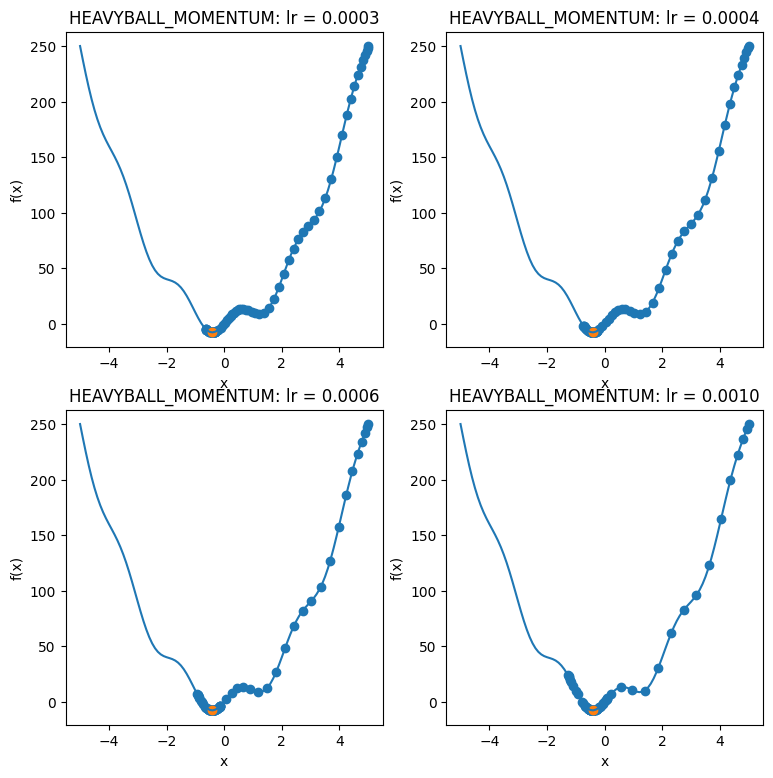

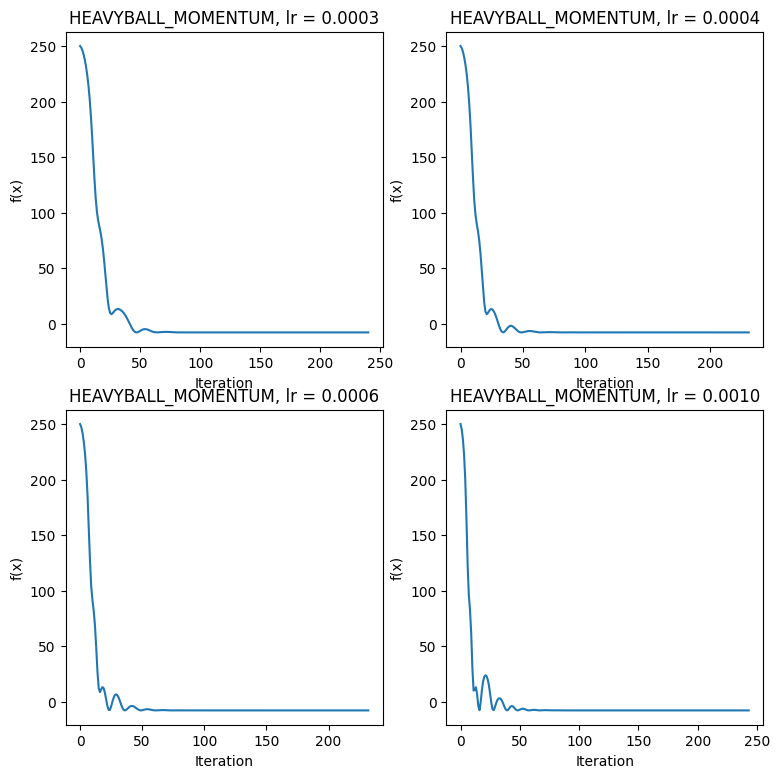

In [9]:
#@title q5( ) test
#@markdown The test function `q5()` runs your Heavy-ball Momentum implementation
#@markdown with four different learning rates to find
#@markdown $$w^\star = \underset{w}{\arg \min} f(w) = 10w^2 + 10\sin(\pi w).$$
#@markdown The starting point used by this test is $w_0=5$ and the maximum
#@markdown number of iteration is set to $2000$.

#@markdown This function reports the value of $w^\star$ together with some other
#@markdown information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q5()

* With learning rate 0.0005: $w^\star=$ [3.34084124e-05 2.06605807e-10], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [1.33633650e-04 1.65284645e-08], and converged after 439 iterations

* With learning rate 0.0008: $w^\star=$ [2.85528810e-06 6.97931565e-06], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [1.14211524e-05 5.58345252e-04], and converged after 245 iterations

* With learning rate 0.0010: $w^\star=$ [-6.19903302e-06 -4.53637200e-06], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [-2.47961321e-05 -3.62909760e-04], and converged after 249 iterations

* With learning rate 0.0030: $w^\star=$ [ 4.85339880e-06 -4.55450433e-06], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [ 1.94135952e-05 -3.64360346e-04], and converged after 253 iterations

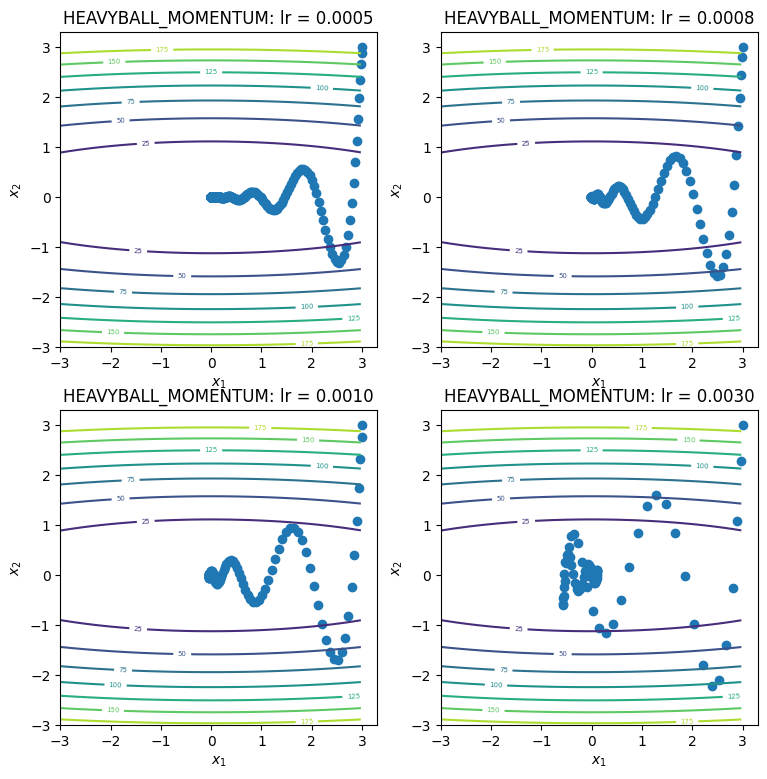

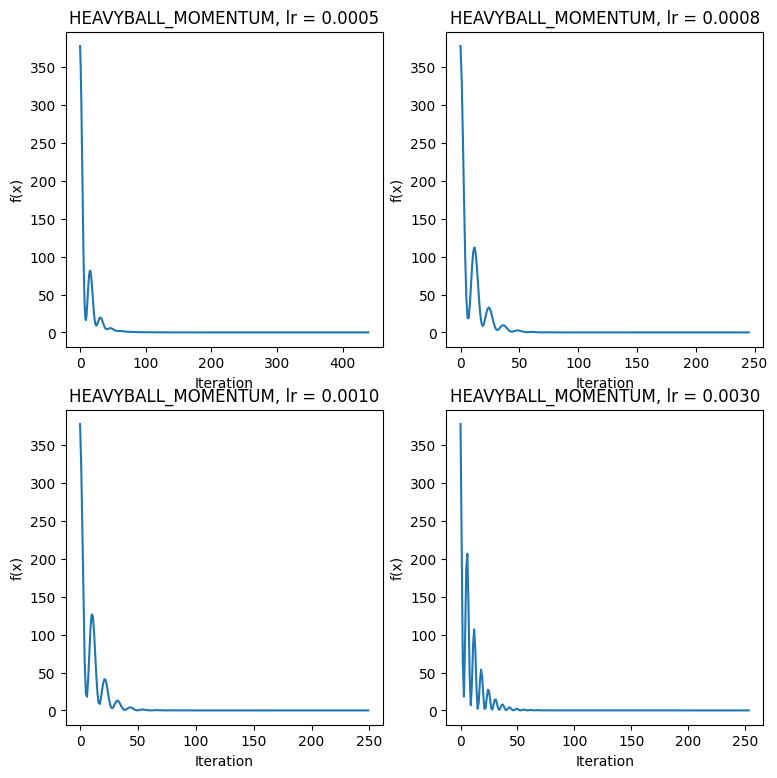

In [10]:
#@title q6( ) test
#@markdown The test function `q6()` runs your Heavy-ball Momentum implementation
#@markdown with four different learning rates to find
#@markdown $$\underline{w}^\star = \underset{\underline{w}}{\arg \min} f(\underline{w}) = 2w_1^2 + 0.2w_2^2.$$
#@markdown The starting point used by this test is $\underline{w}_0=(3,3)$, and
#@markdown the maximum number of iteration is set to $500$.

#@markdown This function reports the value of $w^\star$ together with some other
#@markdown information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q6()

* With learning rate 0.0003: $w^\star=$ -0.41492, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ -0.00102, and converged after 197 iterations

* With learning rate 0.0004: $w^\star=$ -0.41490, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ 0.00084, and converged after 175 iterations

* With learning rate 0.0006: $w^\star=$ -0.41492, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ -0.00088, and converged after 151 iterations

* With learning rate 0.0010: $w^\star=$ -0.41491, $f(w^\star)=$ -7.92332 and $\nabla f(w^\star)=$ 0.00052, and converged after 123 iterations

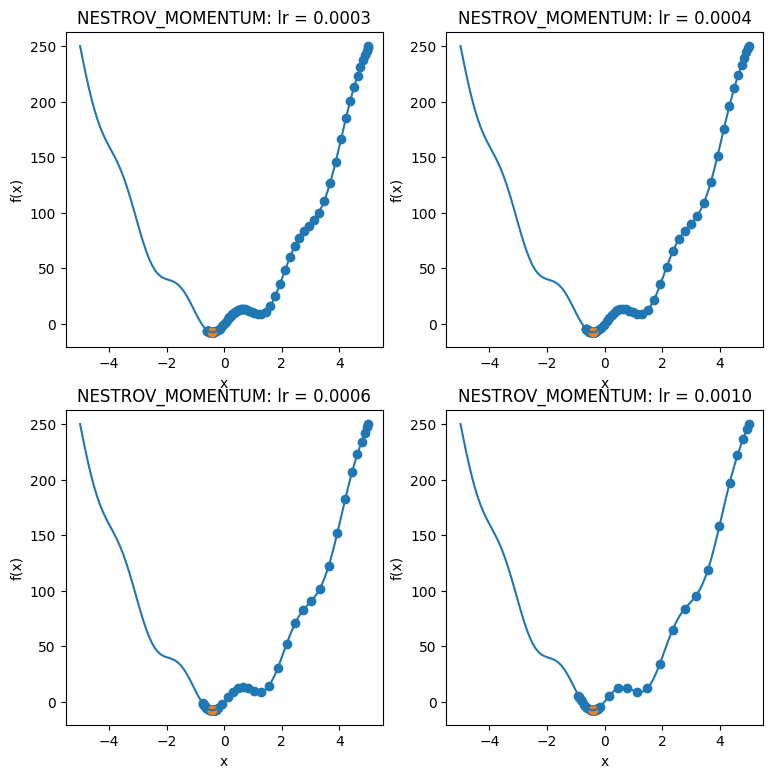

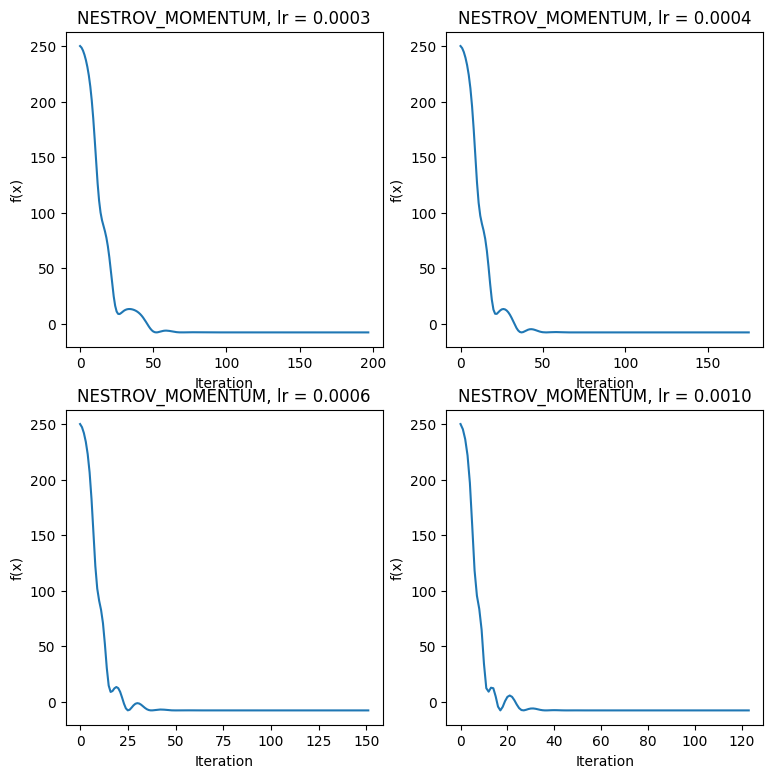

In [11]:
#@title q7( ) test
#@markdown The test function `q7()` runs the Nestrov Momentum implementation
#@markdown with four different learning rates to find
#@markdown $$w^\star = \underset{w}{\arg \min} f(w) = 10w^2 + 10\sin(\pi w).$$
#@markdown The starting point used by this test is $w_0=5$ and the maximum
#@markdown number of iteration is set to $2000$.

#@markdown This function reports the value of $w^\star$ together with some other
#@markdown information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q7()

* With learning rate 0.0005: $w^\star=$ [3.49177900e-05 1.28220052e-14], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [1.39671160e-04 1.02576042e-12], and converged after 452 iterations

* With learning rate 0.0008: $w^\star=$ [-1.15849071e-05 -1.58144449e-09], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [-4.63396286e-05 -1.26515559e-07], and converged after 242 iterations

* With learning rate 0.0010: $w^\star=$ [ 9.59265828e-06 -7.76829380e-10], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [ 3.83706331e-05 -6.21463504e-08], and converged after 232 iterations

* With learning rate 0.0030: $w^\star=$ [3.07056938e-05 1.49062704e-16], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [1.22822775e-04 1.19250163e-14], and converged after 195 iterations

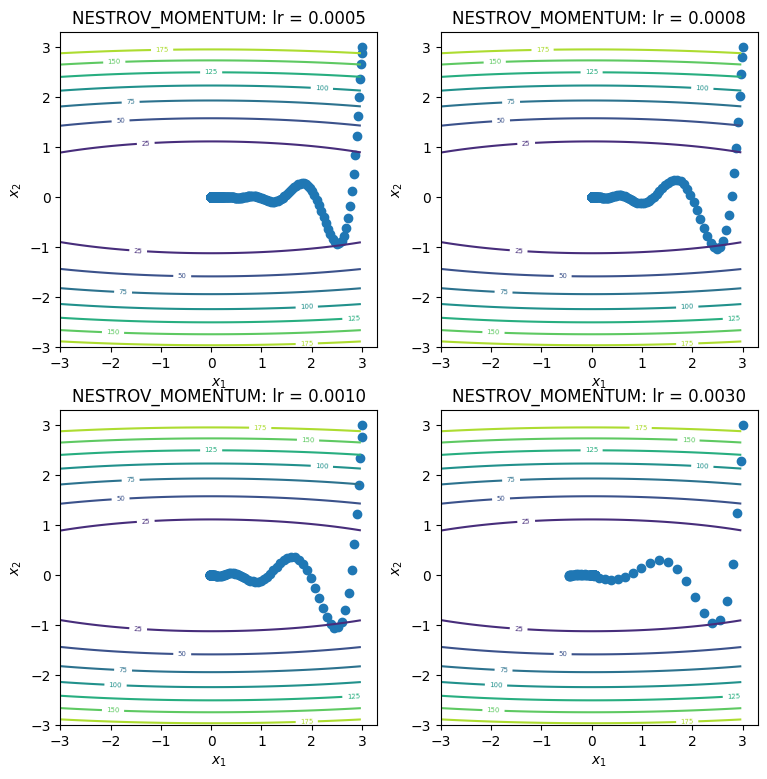

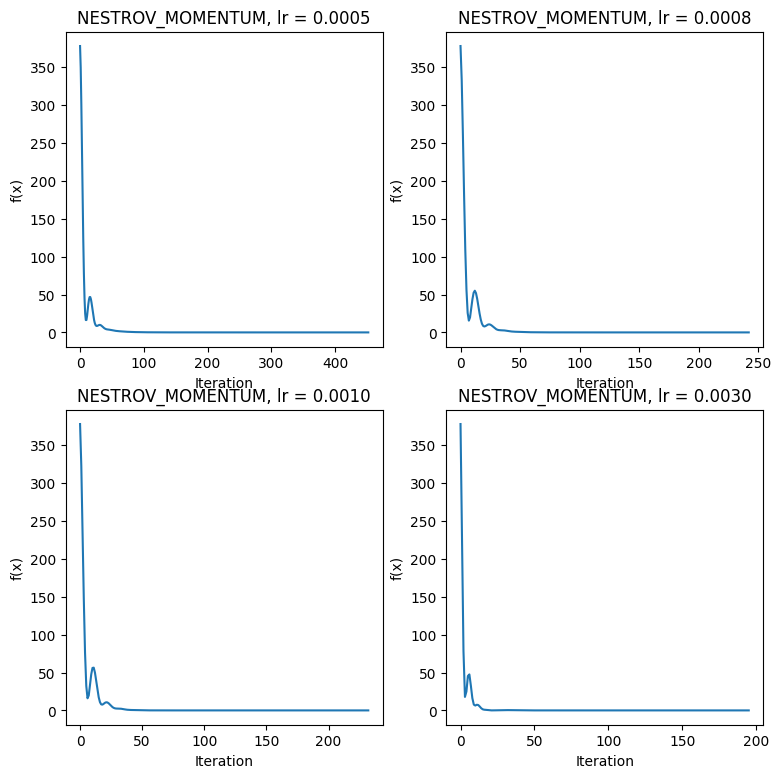

In [12]:
#@title q8( ) test
#@markdown The test function `q8()` runs your Nestrov Momentum implementation
#@markdown with four different learning rates to find
#@markdown $$\underline{w}^\star = \underset{\underline{w}}{\arg \min} f(\underline{w}) = 2w_1^2 + 0.2w_2^2.$$
#@markdown The starting point used by this test is $\underline{w}_0=(3,3)$, and
#@markdown the maximum number of iteration is set to $500$.

#@markdown This function reports the value of $w^\star$ together with some other information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q8()

## 1.3 `Optimizer.adam` method
In this part, you should implement the  `Optimizer.adam` method. See the posted handout for more information about Adam/

You will be implementing the function listed below.
  * `adam(self, gradient)`

Useful attributes for implementing this function is:
  * `self.lr`, `self.beta_m`. `self.beta_v` and `self.epsilon`
  * `self.m`, `self.v`, and `self.t`

Furthermore, useful functions in `NumPy` for implementing this method are:
  * `square`  and `sqrt`

After completing the implementation of `Optimizer.adam`, run the following cells to execute tests `tests_A2.q9()`, `tests_A2.q10()`, and `tests_A2.q11()`.

* With learning rate 0.1000: $w^\star=$ [-0.00019559 -0.00019559], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [-0.00078238 -0.01564756], and converged after 186 iterations

* With learning rate 0.2000: $w^\star=$ [-3.86893683e-05 -3.86893689e-05], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [-0.00015476 -0.00309515], and converged after 214 iterations

* With learning rate 0.3000: $w^\star=$ [1.69916283e-05 1.69916284e-05], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [6.79665131e-05 1.35933027e-03], and converged after 229 iterations

* With learning rate 0.5000: $w^\star=$ [-6.60607619e-05 -6.60607619e-05], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [-0.00026424 -0.00528486], and converged after 202 iterations

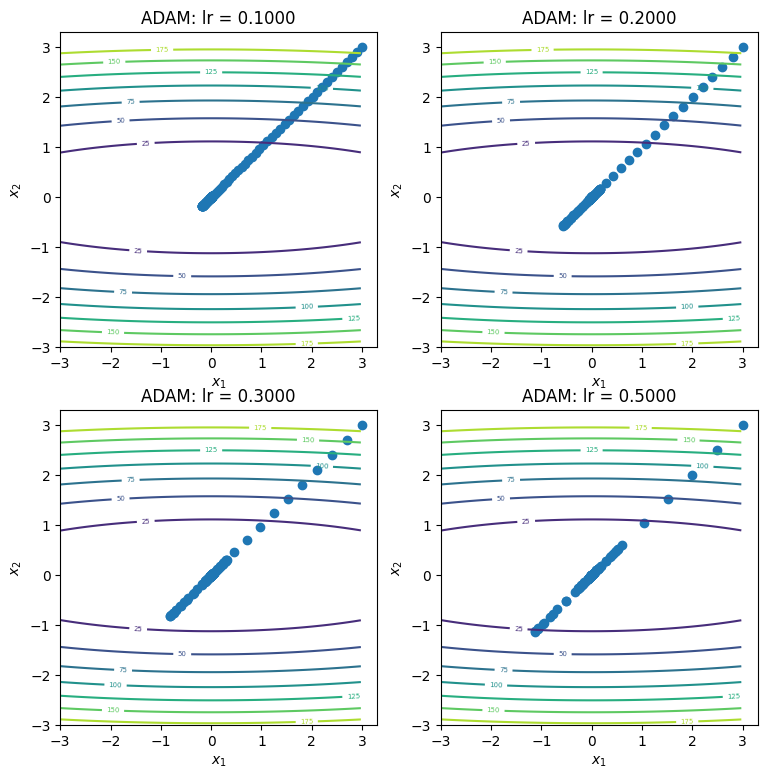

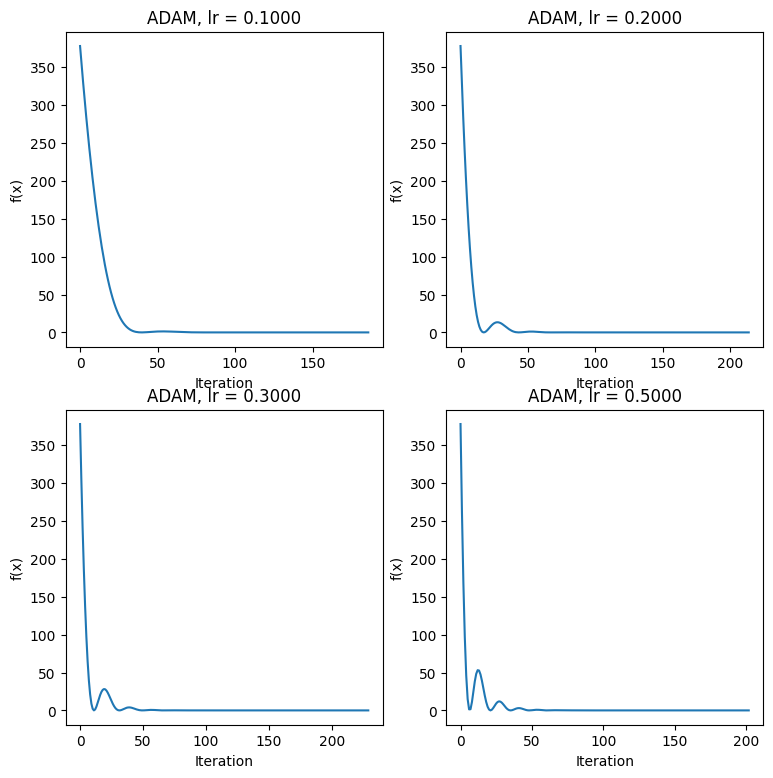

In [13]:
#@title q9( ) test
#@markdown The test function `q9()` runs your Adam implementation with four
#@markdown different learning rates to find
#@markdown $$w^\star = \underset{w}{\arg \min} f(w) = 2w_1^2 + 0.2w_2^2.$$
#@markdown The starting point used by this test is $\underline{w}_0=(3,3)$, and
#@markdown  the maximum number of iteration is set to $500$.

#@markdown This function reports the value of $w^\star$ together with some other
#@markdown  information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q9()

* With learning rate 0.1000: $w^\star=$ [-0.00019559 -0.00019559], $f(w^\star)=$ 0.00016 and $\nabla f(w^\star)=$ [-0.07823781 -1.56475624], and converged after 186 iterations

* With learning rate 0.2000: $w^\star=$ [-3.86893689e-05 -3.86893689e-05], $f(w^\star)=$ 0.00001 and $\nabla f(w^\star)=$ [-0.01547575 -0.30951495], and converged after 214 iterations

* With learning rate 0.3000: $w^\star=$ [1.69916284e-05 1.69916284e-05], $f(w^\star)=$ 0.00000 and $\nabla f(w^\star)=$ [0.00679665 0.13593303], and converged after 229 iterations

* With learning rate 0.5000: $w^\star=$ [-6.60607619e-05 -6.60607619e-05], $f(w^\star)=$ 0.00002 and $\nabla f(w^\star)=$ [-0.0264243  -0.52848609], and converged after 202 iterations

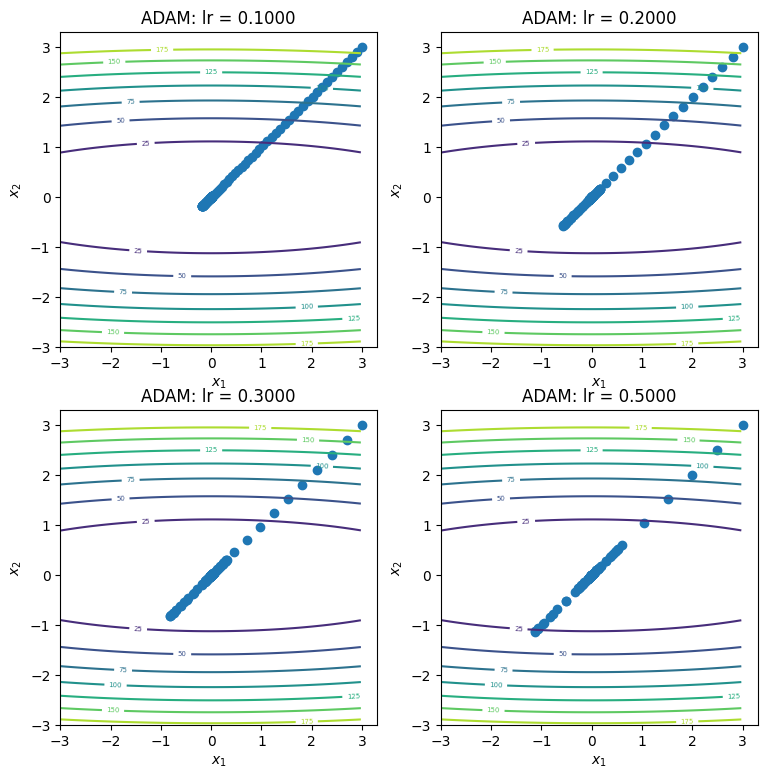

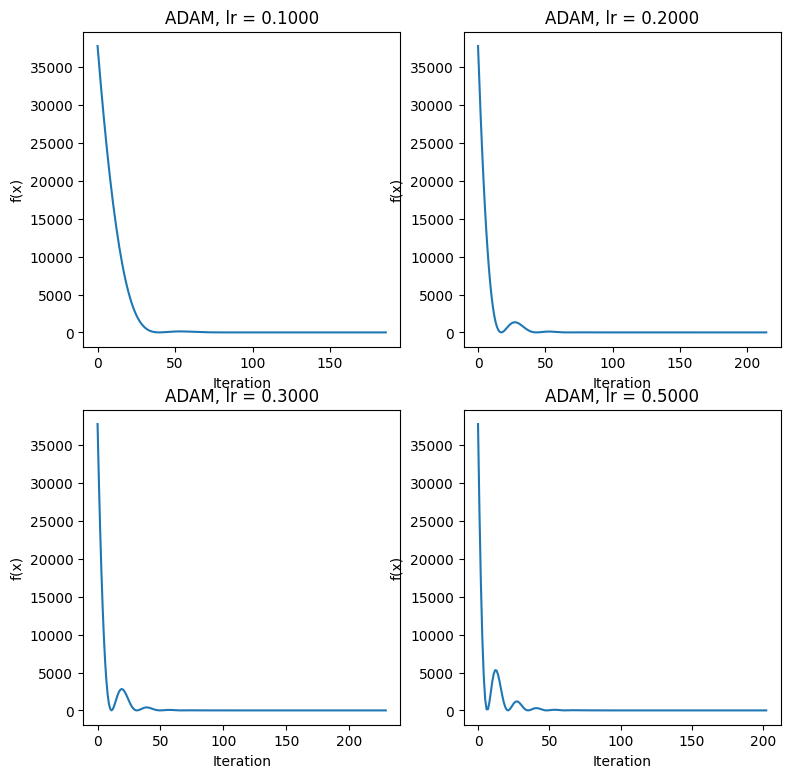

In [14]:
#@title q10( ) test
#@markdown The test function `q10()` runs your Adam implementation with four
#@markdown different learning rates to find
#@markdown $$\underline{w}^\star = \underset{\underline{w}}{\arg \min} f(\underline{w}) = 1000(2w_1^2 + 0.2w_2^2).$$
#@markdown This function is the scaled version of the function used in test `q9()`.
#@markdown The starting point used by this test is $\underline{w}_0=(3,3)$, and
#@markdown the maximum number of iteration is set to $500$.

#@markdown This function reports the value of $w^\star$ together with some other information on your screen.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q10()

/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2/tests_A2.py:21: RuntimeWarning: overflow encountered in scalar multiply
  f42 = lambda x: 2000 * (0.1 * x[0] ** 2 + 2 * x[1] ** 2)
/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2/tests_A2.py:21: RuntimeWarning: overflow encountered in scalar power
  f42 = lambda x: 2000 * (0.1 * x[0] ** 2 + 2 * x[1] ** 2)
/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2/tests_A2.py:22: RuntimeWarning: overflow encountered in multiply
  df42dw = lambda x: 2000 * (np.array([0.2 * x[0], 4 * x[1]]))
/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2/myTorch.py:64: RuntimeWarning: invalid value encountered in add
  return np.float64(self.v)


* With learning rate 0.0005: $w^\star=$ [-3.56377374e-36             nan], $f(w^\star)=$ nan and $\nabla f(w^\star)=$ [-1.4255095e-33            nan], and converged after 500 iterations

* With learning rate 0.0008: $w^\star=$ [-6.77179264e-54             nan], $f(w^\star)=$ nan and $\nabla f(w^\star)=$ [-2.70871706e-51             nan], and converged after 500 iterations

* With learning rate 0.0010: $w^\star=$ [-2.07103333e-67             nan], $f(w^\star)=$ nan and $\nabla f(w^\star)=$ [-8.28413334e-65             nan], and converged after 500 iterations

* With learning rate 0.0030: $w^\star=$ [1.82563546e-92            nan], $f(w^\star)=$ nan and $\nabla f(w^\star)=$ [7.30254185e-90            nan], and converged after 500 iterations

Error in callback <function _draw_all_if_interactive at 0x7cf366db8ee0> (for post_execute):


IndexError: index 0 is out of bounds for axis 0 with size 0

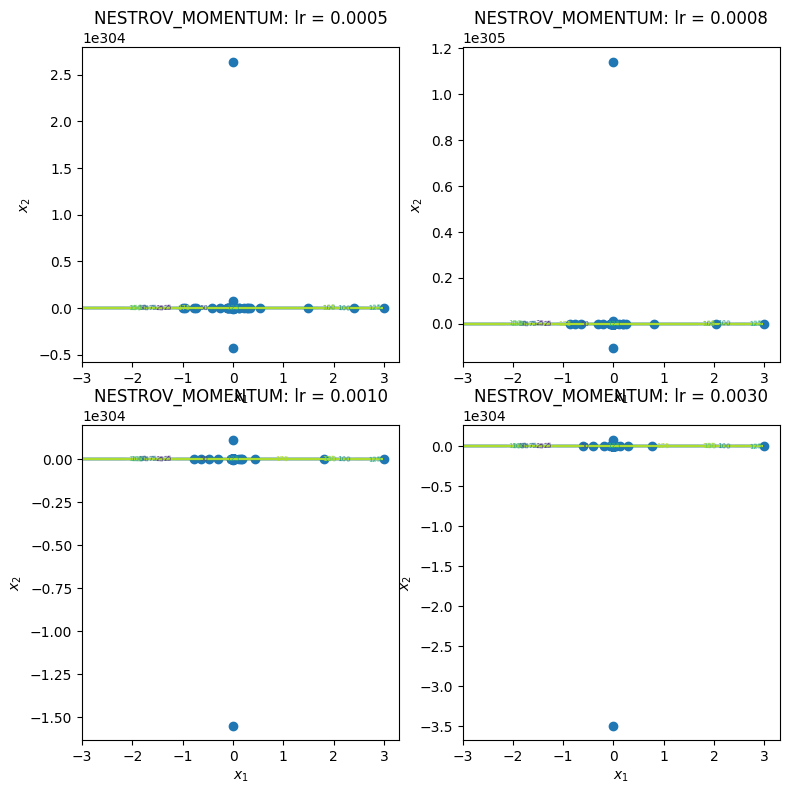

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 900x900 with 4 Axes>

In [17]:
#@title q11( ) test
#@markdown The test function `q11()` runs your **Nestrov Momentum** i
#@markdown mplementation with four different learning rates to find
#@markdown $$\underline{w}^\star = \underset{\underline{w}}{\arg \min} f(\underline{w}) = 1000(2w_1^2 + 0.2w_2^2).$$
#@markdown This function is the same function used in test `q10()`.
#@markdown The starting point used by this test is $\underline{w}_0=(3,3)$, and
#@markdown the maximum number of iteration is set to $500$.

#@markdown You would most probably see some strange behavior and bunch of errors.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q11()

# 2. Multiclass Logistic Regression
In the `myTorch.py` file, you will complete the `MultiClassLogisticRegression` class implementation.

## 2.1 Implementing the Multiclass Logistic Regression Model

In [15]:
#@title q12( ) test: Run after implementing `add_bias`
#@markdown The following tests your implementation of `add_bias`.
#@markdown This function inserts a column of $1$'s to $X$.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q12()


Input:
[[0 0]
 [3 2]
 [0 1]]
 your output:
[[1. 0. 0.]
 [1. 3. 2.]
 [1. 0. 1.]]
 expected output:
[[1 0 0]
 [1 3 2]
 [1 0 1]]


In [16]:
#@title q13( ) test: Run after implementing `unique_classes_`, `class_labels_`, and `one_hot test`
#@markdown The following tests your implementation of `unique_classes_`,
#@markdown `class_labels_`, and `one_hot test`.

#@markdown * `unique_classes_`: This function returns a list that contains the
#@markdown unique elements in `y`.

#@markdown * `class_labels_`: This function returns a dictionary with elements of
#@markdown the list `classes` as its keys and a unique integer from $0$ to the
#@markdown total number of classed as their values. For instance, if
#@markdown `classes = ['blue', 'red', 'yellow']`, then
#@markdown `class_labels_(classes) = {'blue': 0, 'red': 1, 'yellow': 2}`

#@markdown * `one_hot test`: This function returns the one-hot encoded version
#@markdown of `y`.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q13()

Input: ['black', 'red', 'yellow', 'yellow', 'red']
 expected classes: ['black' 'red' 'yellow']
 returned classes: ['black' 'red' 'yellow']
 expected class_labels: {'black': 0, 'red': 1, 'yellow': 2}
 returned class_labels: {'black': 0, 'red': 1, 'yellow': 2}
 Expected one-hot-encoded:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
 returned One-hot-encoded:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [17]:
#@title q14( ) test: Run after implementing `softmax`
#@markdown The following tests your implementation of `softmax`. This function
#@markdown is the softmax function, which converts each row of the input matrix
#@markdown `z` into a probability distribution. Thus, if
#@markdown `z`$\in \mathbb{R}^{n \times c}$ ,then `softmax(z)` returns a matrix
#@markdown in $\mathbb{R}^{n \times c}$, where each element is non-negative and
#@markdown each row of the returned matrix should sum to $1$. Standard `NumPy`
#@markdown functions like `exp()`, `sum`, ... can be used.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q14()

Input z:
[[-1, -1, -1],
 [-100, -100, 100],
 [1,   1+ln(2),  1+ln(2)]]
Expected output (the displayed expected output is rounded for better illustration):
[[1/3 1/3 1/3]
 [0.00 0.00 1.00]
 [0.20 0.40 0.40]]
Returned output:
[[3.33333333e-01 3.33333333e-01 3.33333333e-01]
 [1.38389653e-87 1.38389653e-87 1.00000000e+00]
 [2.00000000e-01 4.00000000e-01 4.00000000e-01]]


In [18]:
#@title Can you manually set the weights parameter?
#@markdown A `MultiClassLogisticRegression` object has weights attribute.
#@markdown We can set the weights of a `MultiClassLogisticRegression` model by
#@markdown setting its `weights` attribute.

#@markdown For instance, consider the code in this cell.

reload(myTorch)
logr = myTorch.MultiClassLogisticRegression()


w = np.array([[1, 1, 3],
              [3, 1, -2],
              [0, 2, 0]])
logr.weights = w

print(logr.weights)

[[ 1  1  3]
 [ 3  1 -2]
 [ 0  2  0]]


In [19]:
#@title q15( ) test: Run after implementing `predict_with_augmented_X`
#@markdown The following tests your implementation of `predict_with_augmented_X`.
#@markdown This function returns the predicted probability distribution for each
#@markdown datapoint in `X`, *i.e.*, each row of `X`, based on the model's weight
#@markdown parameter. Note that the input to this function must be an augmented
#@markdown input matrix.

#@markdown Assuming that input $X \in \mathbb{R}^{M \times (d+1)}$
#@markdown and model's weight, *i.e.*, `self.weights` is in
#@markdown $\mathbb{R}^{c \times (d+1)},$. Note that each row corresponds to the
#@markdown weight parameter of a class. `predict_with_X_aug_(X)` returns a matrix
#@markdown in $\mathbb{R}^{M \times c}$, where each row of it is a valid
#@markdown probability distribution.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q15()

Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Input augmented X:
[[ 1  0  1]
 [ 1  1  0]
 [ 1  2  1]
 [ 1 -1 -1]]
Expected output (the displayed expected output is rounded for better illustration):
[[0.46..., 0.063..., 0.46...],
 [0.21.., 0.21..., 0.57...],
 [0.11..., 0.015..., 0.86...],
 [0.11... , 0.84..., 0.042...]]
Returned output:
[[0.46831053 0.06337894 0.46831053]
 [0.21194156 0.21194156 0.57611688]
 [0.11731043 0.01587624 0.86681333]
 [0.1141952  0.84379473 0.04201007]]


In [20]:
#@title q16( ) test: Run after implementing `predict`
#@markdown The following tests your implementation of `predict`. This function
#@markdown returns the predicted probability distribution for each datapoint in
#@markdown `X`, *i.e.*, each row of `X`, based on the model's weight parameter.

#@markdown Note that the input to this function is not an augmented input.
#@markdown Assuming that input $X \in \mathbb{R}^{M \times (d)}$ and model's
#@markdown weight, *i.e.*, `self.weights` is in $\mathbb{R}^{c \times (d+1)},$
#@markdown`predict(X)` returns a matrix in $\mathbb{R}^{M \times c}$, where each
#@markdown row of it is a valid probability distribution.

#@markdown Useful methods for implementing this method are:
#@markdown * `self.add_bias`
#@markdown * `self.predict_with_X_aug_`

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q16()

Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Input X:
[[ 0  1]
 [ 1  0]
 [ 2  1]
 [-1 -1]]
Expected output (the displayed expected output is rounded for better illustration):
[[0.46..., 0.063..., 0.46...],
 [0.21.., 0.21..., 0.57...],
 [0.11..., 0.015..., 0.86...],
 [0.11... , 0.84..., 0.042...]]
Returned output:
[[0.46831053 0.06337894 0.46831053]
 [0.21194156 0.21194156 0.57611688]
 [0.11731043 0.01587624 0.86681333]
 [0.1141952  0.84379473 0.04201007]]


In [21]:
#@title q17( ) test: Run after implementing `predict_classes`
#@markdown The following tests your implementation of `predict_classes`.
#@markdown This function returns the predicted class for each datapoint in `X`,
#@markdown *i.e.*, each row of `X`, based on the model's weight parameter.

#@markdown Note that the input to this function is not an augmented input.
#@markdown Assuming that input $X \in \mathbb{R}^{M \times (d)}$ and model's
#@markdown weight, *i.e.*, `self.weights` is in $\mathbb{R}^{c \times (d+1)},$
#@markdown `predict_classes(X)` returns an `numpy ndarray` with $M$ elements,
#@markdown where each element denotes the predicted class for one of the
#@markdown datapoints. The predicted class, is the class with highest predicted
#@markdown probability.

#@markdown Useful methods for implementing this method are `self.predict` and
#@markdown `argmax` form `NumPy`

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q17()

Model's unique classes: [ 1  5 15]
Model's class labels: {1: 0, 5: 1, 15: 2}
Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Input X:
[[ 0  1]
 [ 1  0]
 [ 2  1]
 [-1 -1]]
Expected output (type: value):
<class 'numpy.ndarray'>: [ 1 15 15  5]
Returned output (type: value):
<class 'numpy.ndarray'>: [ 1 15 15  5]


In [22]:
#@title q18( ) test: Run after implementing `score`
#@markdown The following tests your implementation of `score`. This function
#@markdown returns the ratio of the datapoints in `X` that are correctly
#@markdown classified by your model, *i.e.*, the predicted class is derived by
#@markdown `predict_classes` function matches the true class specified in `y`.

#@markdown Note that `X` is not augmented.

#@markdown Useful methods for implementing this method is `self.predict_classes`

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q18()

Model's unique classes: [ 1  5 15]
Model's class labels: {1: 0, 5: 1, 15: 2}
Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Input X:
[[ 0  1]
 [ 1  0]
 [ 1  0]
 [-1 -1]
 [ 1  1]]
True labels: [1, 5, 15, 1, 15]
Expected score: 0.6
Returned score: 0.6


In [23]:
#@title q19( ) test: Run after implementing `evaluate_`
#@markdown The following tests your implementation of `evaluate_`.
#@markdown This function returns the ratio of the datapoints that are correctly
#@markdown classified by your model. Note that the input data batch to `evaluate_`
#@markdown is augmented and the true labels are one-hot-encoded.

#@markdown Useful methods for implementing this method are `self.predict_with_X_aug_`
#@markdown and `argmax` form `NumPy`.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q19()

Model's unique classes: [ 1  5 15]
Model's class labels: {1: 0, 5: 1, 15: 2}
Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Augmented Input:
[[ 1  0  1]
 [ 1  1  0]
 [ 1  1  0]
 [ 1 -1 -1]
 [ 1  1  1]]
True labels: [1, 5, 15, 1, 15]
One-hot-encoded True labels:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
Expected output: 0.6
Returned output: 0.6


In [24]:
#@title q20( ) test: Run after implementing `cross_entropy`
#@markdown The following tests your implementation of `cross_entropy`.
#@markdown This function returns the cross entropy error given the
#@markdown one-hot-encoded version of the true labels and the predicted
#@markdown probabilities. Therefore, for a batch of $M$ datapoitns,
#@markdown `y_one_hot_encoded` is a $M$ by $c$ matrix and `probs` is a $M$ by
#@markdown $c$ matrix, where each row contains the predicted probability
#@markdown distribution for a datapoint in the batch.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q20()

Model's unique classes: [ 1  5 15]
Model's class labels: {1: 0, 5: 1, 15: 2}
Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Augmented Input:
[[ 1  0  1]
 [ 1  1  0]
 [ 1  1  0]
 [ 1 -1 -1]
 [ 1  1  1]]
True labels: [1, 5, 15, 1, 15]
One-hot-encoded True labels:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
Expected gradient: 1.076...
Returned output: 1.0760742679736177


In [25]:
#@title q21( ) test: Run after implementing `compute_grad`
#@markdown The following tests your implementation of `compute_grad`.
#@markdown Given an augmented batch of data `X` in $\mathbb{R}^{M\times (d+1)}$,
#@markdown the one-hot-encoded true labels of the data batch,
#@markdown and the weight parameters `w` in $\mathbb{R}^{c \times (d+1)}$
#@markdown where $c$ denote the number of classes,
#@markdown this function returns the gradients of $E_{\text{in}}$ at `w`.

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q21()

Model's unique classes: [ 1  5 15]
Model's class labels: {1: 0, 5: 1, 15: 2}
Model's weight:
[[ 0  1  0]
 [ 0  1 -2]
 [ 0  2  0]]
Augmented Input:
[[ 1  0  1]
 [ 1  1  0]
 [ 1  1  0]
 [ 1 -1 -1]
 [ 1  1  1]]
True labels: [1, 5, 15, 1, 15]
One-hot-encoded True labels:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
Expected gradient:
[[-0.146...,  0.313...,  0.122...],
 [ 0.073..., -0.276..., -0.149...],
 [ 0.073..., -0.036...,  0.026... ]]
Returned output:
[[-0.14682294  0.31383688  0.12272236]
 [ 0.07323516 -0.27695852 -0.14905935]
 [ 0.07358778 -0.03687836  0.026337  ]]


## 2.2 Implementing the Learning Algorithm

In this part, you will implement the `fit` function. This function fits the logistic regression model to the input dataset.  For more instructions and hints, see the comments in the `myTorch.py` file.  Useful functions in `NumPy` for implementing this method are:
  * `random.choice`
  * `abs`
  * `max`

sgd Evaluation Score: 1.0
heavyball_momentum Evaluation Score: 1.0
nestrov_momentum Evaluation Score: 1.0
adam Evaluation Score: 1.0


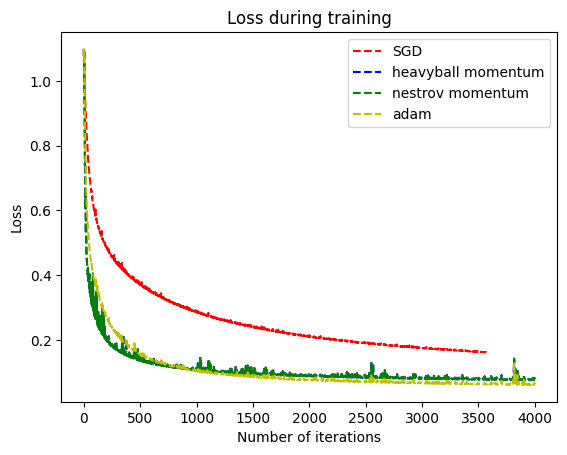

In [14]:
#@title q22( ) test: `fit` test with iris dataset. Run after implementing `fit`

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q22()

sgd Evaluation Score: 0.9722222222222222
heavyball_momentum Evaluation Score: 0.9722222222222222
nestrov_momentum Evaluation Score: 0.9722222222222222
adam Evaluation Score: 0.9638888888888889


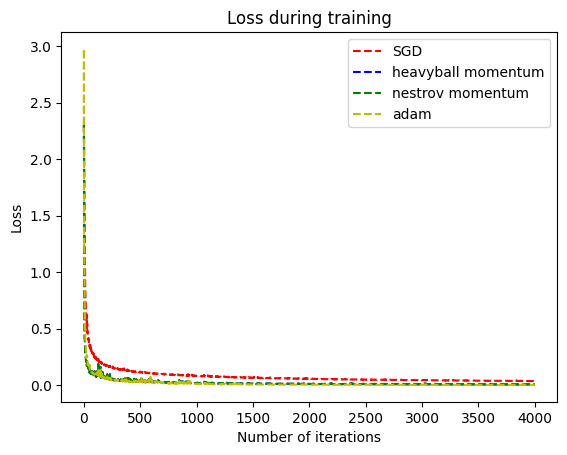

In [13]:
#@title q23( ) test: `fit` test with digits dataset. Run after implementing `fit`

reload(myTorch)
reload(util)
reload(tests_A2)

tests_A2.q23()

# 3. K-means Clustering

In [27]:
#@title K-Means small test for simple sanity check
#@markdown You can use this small example to manually check if your
#@markdown implementation is working properly

reload(myTorch)
reload(util)

x1 = {0:0, 1:0}
x2 = {0:0, 1:1}
x3 = {0:0, 1:2}
x4 = {0:0, 1:3}
x5 = {0:0, 1:4}
x6 = {0:0, 1:5}
examples = [x1, x2, x3, x4, x5, x6]
centers, assignments, totalCost = myTorch.kmeans(examples, 2, maxIters=10)

/content/gdrive/MyDrive/ece421_f2024_A2_folder/ece421fall24_assignments/A2/myTorch.py:522: RuntimeWarning: invalid value encountered in scalar divide
  similarity = util.dotProduct(center, example) / (center_norms[j] * example_norm)


In [1]:
#@title K-Means not so small test to check the stability of your solution.
#@markdown We just provided the skeleton of the test. You have to modify this
#@markdown cell to create a meaningful test on your own.

K = 6
examples = util.generateClusteringExamples(numExamples=10000, numWordsPerTopic=3, numFillerWords=10000)

centers, assignments, totalCost = myTorch.kmeans(examples, K, maxIters=100)

averages = []

for center in centers:
    xs = [examples[i] for i in range(len(examples)) if centers[assignments[i]] == center]
    allWords = []
    for x in xs:
        for key in list(x.keys()):
            if key not in allWords:
                allWords.append(key)
    wordVals = [(word, sum([x[word] for x in xs])*1.0/len(xs)) for word in allWords]
    avg = dict(wordVals)
    averages.append(avg)

# study averages to check if your solution is stable.

NameError: name 'util' is not defined